In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
def insertBreak():
    print("-"*75)
    

In [3]:
allDataDF = pd.read_csv("data.csv", header = None)
allDataDF = allDataDF.drop(columns = [12])
allDataDF.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,30.0,134.0,74.0,33.0,28.0,34.0,28.0,105.0,46.0,10.998667,-1.0,0.0
1,29.0,133.0,73.0,33.0,27.0,34.0,28.0,103.0,46.0,10.998667,-1.0,0.0
2,29.0,133.0,71.0,33.0,27.0,36.0,28.0,102.0,45.0,10.998667,-1.0,0.0
3,30.0,132.0,70.0,34.0,27.0,36.0,28.0,100.0,45.0,10.998667,-1.0,0.0
4,31.0,130.0,69.0,33.0,27.0,36.0,28.0,99.0,45.0,10.998667,-1.0,0.0


In [4]:
xDF = allDataDF.drop(columns = [11])
yDF = allDataDF.drop(columns = range(11))

print("xDF: "+str(xDF.shape)+"\nyDF: "+str(yDF.shape))
insertBreak()


xDF: (9299, 11)
yDF: (9299, 1)
---------------------------------------------------------------------------


Input Features:

Feature-1:


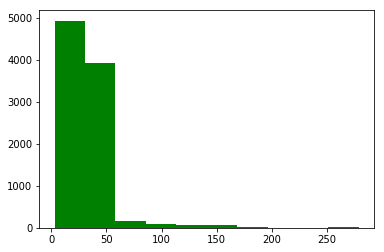

Feature-2:


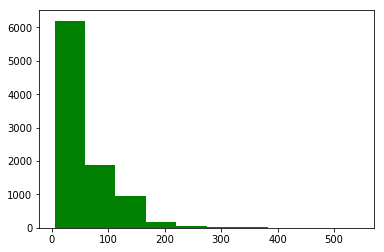

Feature-3:


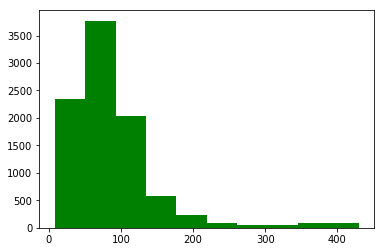

Feature-4:


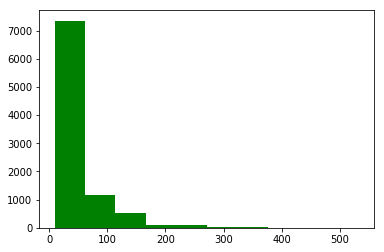

Feature-5:


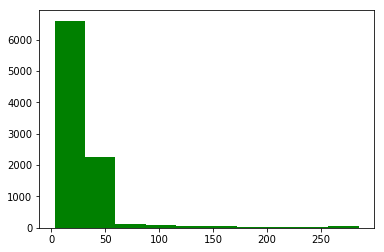

Feature-6:


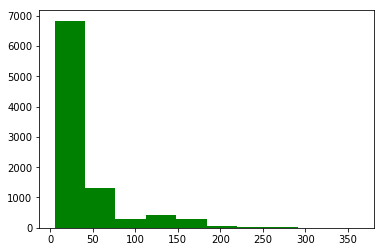

Feature-7:


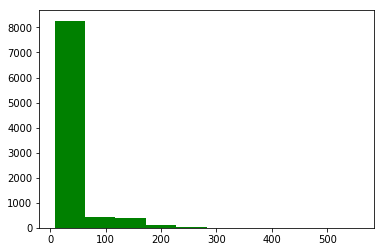

Feature-8:


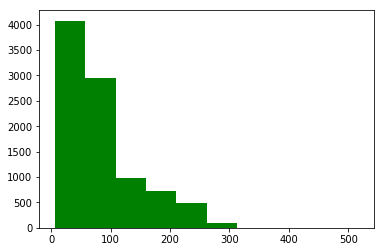

Feature-9:


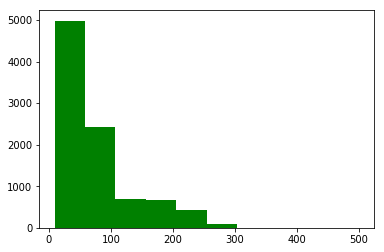

Feature-10:


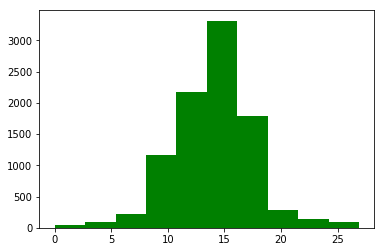

Feature-11:


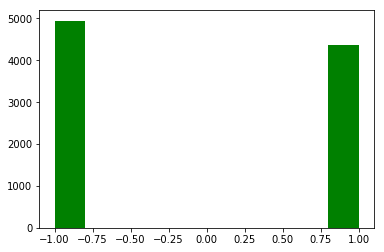

---------------------------------------------------------------------------


In [ ]:
print("Input Features:\n")
for i in range(xDF.shape[1]):
    print("Feature-"+str(i+1)+":")
    x = plt.hist(xDF[i], color=['green'])
    plt.show()

insertBreak()


In [ ]:
#Comment on features: Alot of features seem to be distributed logarithmicly


In [ ]:
toTrain = 1.0

trainCount = int(toTrain * xDF.shape[0])
xTrain = xDF.loc[:trainCount]
xTest = xDF.loc[trainCount:]
yTrain = yDF.loc[:trainCount]
yTest = yDF.loc[trainCount:]


In [ ]:
print("xTrain: "+str(xTrain.shape)+" | yTrain: "+str(xTest.shape))
print("yTrain: "+str(yTrain.shape)+" | yTest: "+str(yTest.shape))

insertBreak()


xTrain: (9299, 11) | yTrain: (0, 11)
yTrain: (9299, 1) | yTest: (0, 1)
---------------------------------------------------------------------------


In [ ]:
def multilayerPerceptron(x, weights, biases, keep_prob):
    layer1 = tf.add( tf.matmul(x, weights['h1']), biases['b1'] )
    layer1 = tf.nn.relu(layer1)
    layer1 = tf.nn.dropout(layer1, keep_prob)
    
    outLayer = tf.matmul(layer1, weights['out']) + biases['out']
    
    return outLayer




In [ ]:
nH1 = 50
nInput = xTrain.shape[1]
nOutput = 1

weights = {
    'h1':tf.Variable(tf.random_normal([nInput, nH1])),
    'out':tf.Variable(tf.random_normal([nH1, nOutput]))   
}
biases = {
    'b1':tf.Variable(tf.random_normal([nH1])),
    'out':tf.Variable(tf.random_normal([nOutput]))
}

alpha = 0.001
keep_prob = tf.placeholder("float")
epochs = 5000*18
displayStep = 1000

x = tf.placeholder("float", [None, nInput])
y = tf.placeholder("float", [None, nOutput])



Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
predictions = multilayerPerceptron(x, weights, biases, keep_prob)

cost = tf.reduce_mean( tf.square(y - predictions) )
optimizer = tf.train.AdamOptimizer(alpha).minimize(cost)

saver = tf.train.Saver()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
costVals = []


In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    xBatch = np.array_split(xTrain, 1)
    yBatch = np.array_split(yTrain, 1)
    
    for epoch in range(epochs):
        
        feed_dict = {x: xBatch[0], y: yBatch[0], keep_prob: 1.0}
        _, c = sess.run([optimizer, cost], feed_dict)
        
        costVals += [c]
        if epoch % displayStep == 0:
            print("Epoch: "+str(epoch)+", Cost: "+str(c))
    
    save_path = saver.save(sess, "aBPedalModel7/model.ckpt")

print("Optimization Finished & model saved!")


Epoch: 0, Cost: 329424.44
Epoch: 1000, Cost: 1037.9918
Epoch: 2000, Cost: 394.23407
Epoch: 3000, Cost: 230.25938
Epoch: 4000, Cost: 158.27525
Epoch: 5000, Cost: 108.406364
Epoch: 6000, Cost: 69.2065
Epoch: 7000, Cost: 47.02848
Epoch: 8000, Cost: 31.71549
Epoch: 9000, Cost: 23.990759
Epoch: 10000, Cost: 19.439291
Epoch: 11000, Cost: 16.469902
Epoch: 12000, Cost: 13.951391
Epoch: 13000, Cost: 11.870665
Epoch: 14000, Cost: 10.506233
Epoch: 15000, Cost: 9.291169
Epoch: 16000, Cost: 8.346791
Epoch: 17000, Cost: 7.5491853
Epoch: 18000, Cost: 6.9434566
Epoch: 19000, Cost: 6.4594536
Epoch: 20000, Cost: 6.0432315
Epoch: 21000, Cost: 5.6765914
Epoch: 22000, Cost: 5.350144
Epoch: 23000, Cost: 5.075355
Epoch: 24000, Cost: 4.795535
Epoch: 25000, Cost: 4.5377555
Epoch: 26000, Cost: 4.2951984
Epoch: 27000, Cost: 4.0849705
Epoch: 28000, Cost: 4.141002
Epoch: 29000, Cost: 3.8430262
Epoch: 30000, Cost: 3.6373248
Epoch: 31000, Cost: 3.4341998
Epoch: 32000, Cost: 3.3079176
Epoch: 33000, Cost: 3.1895573
Ep

In [ ]:
plt.plot(range(epochs), costVals)
plt.show()